In [0]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from astropy.visualization import hist

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [3]:
print(os.listdir('/content/drive/My Drive/Colab Notebooks/Divorce'))

['divorce.csv', 'divorce.xlsx', 'divorce.rar', '~$divorce.xlsx']


In [0]:
# Nesta etapa do projeto será realizado testes de hipóteses com intuito de determinar quais resultados podem levar à rejeição da hipótese nula.
# Será utilizado o mesmo dataset:
# https://archive.ics.uci.edu/ml/datasets/Divorce+Predictors+data+set 
# Contêm 54 perguntas (features) para avaliar casamento.

# Foram respondidas por dois groupos:
#   1) Divorciados (coluna "Class" igual a 1)
#   2) Casados (coluna "Class" igual a 0)

# Vamos utilizar conceitos de: z-score, margem de erro, intervalo de confiança e teste de hipotese para descobrir:
#    1) Quais as perguntas chaves para determinar se um relacionamento está fadado ao fracasso
#    2) Prever, com estatisticas simples, se um casal é divorciado ou não
#    3) Responder o que representa as respostas 0,1,2,3 e 4.

divorce = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Divorce/divorce.csv',sep=';')

In [0]:
# No exercicio 01 descobrimos que as features abaixo são as perguntas mais relevantes para determinar o sucesso de um casamento ou não.
# São nelas que vamos nos basear para dar sequência a parte III deste projeto. 

divorce_discussion = divorce[['Atr33','Atr34','Atr35','Atr36','Atr37','Atr39','Atr40','Atr46','Atr48','Class']]

# Relembrando as perguntas:

# 33. I can use negative statements about my spouse's personality during our discussions.
# 34. I can use offensive expressions during our discussions.
# 35. I can insult my spouse during our discussions.
# 36. I can be humiliating when we discussions.
# 37. My discussion with my spouse is not calm.
# 39. Our discussions often occur suddenly.
# 40. We're just starting a discussion before I know what's going on.
# 46. Even if I'm right in the discussion, I stay silent to hurt my spouse.
# 48. I feel right in our discussions.


In [94]:
# Entendendo a distribuição dos dados:
divorce_discussion.describe()

,Atr33,Atr34,Atr35,Atr36,Atr37,Atr39,Atr40,Atr46,Atr48,Class
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.805882,1.900000,1.670588,1.605882,2.088235,2.088235,1.870588,2.552941,2.741176,0.494118
std,1.785202,1.630515,1.842228,1.798412,1.716051,1.719496,1.796039,1.371786,1.137348,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000
50%,1.000000,1.000000,0.500000,0.000000,2.000000,2.000000,1.500000,3.000000,3.000000,0.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


In [0]:
# Separando em arrays diferentes os casados e divorciados
def separate_by_class(dataset):
  classes = np.unique(dataset['Class'])

  separated = []
  for cl in classes:
    separated.append(dataset[dataset['Class'] == cl].drop(['Class'], axis=1))

  return separated

separated = separate_by_class(divorce_discussion)
separated_geral = separate_by_class(divorce)

In [0]:
#@title  Comparando escores-z de conjuntos dos casados e divorciados


In [0]:
# Construindo array, das features selecionadas, para verificar a distribuição normal dos casados e divorciados
d_mean_features = []
c_mean_features = []
for i in separated[1]:
  d_mean_features.append(separated[1][i].mean())
  c_mean_features.append(separated[0][i].mean())

In [0]:
# Construindo array, sem amostragem, para verificar a distribuição normal dos casados e divorciados
d_mean_geral = []
c_mean_geral = []
for i in divorce.columns:
  if i not in 'Class':
    d_mean_geral.append(separated_geral[1][i].mean())
    c_mean_geral.append(separated_geral[0][i].mean())

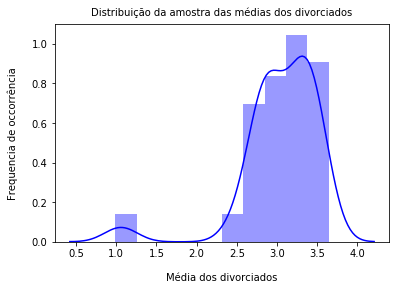

In [155]:
sns.distplot(d_mean_geral, color='blue')
plt.title("Distribuição da amostra das médias dos divorciados", y=1.015, fontsize=10)
plt.xlabel("Média dos divorciados", labelpad=14)
plt.ylabel("Frequencia de occorrência", labelpad=14);

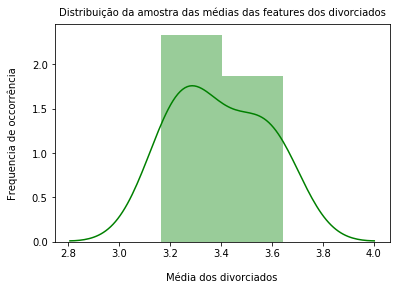

In [159]:
sns.distplot(d_mean_features, color='green')
plt.title("Distribuição da amostra das médias das features dos divorciados", y=1.015, fontsize=10)
plt.xlabel("Média dos divorciados", labelpad=14)
plt.ylabel("Frequencia de occorrência", labelpad=14);

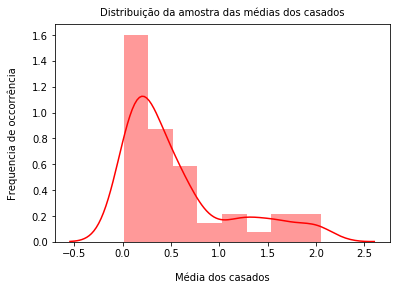

In [160]:
sns.distplot(c_mean_geral, color='red')
plt.title("Distribuição da amostra das médias dos casados", y=1.015, fontsize=10)
plt.xlabel("Média dos casados", labelpad=14)
plt.ylabel("Frequencia de occorrência", labelpad=14);

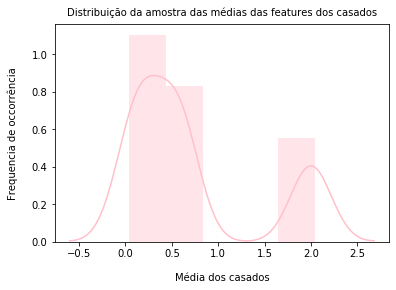

In [162]:
sns.distplot(c_mean_features, color='pink')
plt.title("Distribuição da amostra das médias das features dos casados", y=1.015, fontsize=10)
plt.xlabel("Média dos casados", labelpad=14)
plt.ylabel("Frequencia de occorrência", labelpad=14);

In [228]:
# Média geral: divorciados
Gm = format(separated_geral[1].mean().mean(),'.2f')
Sm = format(separated_geral[1].std().std(),'.2f')

# Média amostragem: divorciados

Dm = format(separated[1].mean().mean(),'.2f')

print('Média geral divorciado  = {}'.format(Gm))
print('Desvio padrão divorciado  = {}'.format(Gd))
print('Média divorciados features  = {}'.format(Dm))

Média geral divorciado  = 3.05
Desvio padrão divorciado  = 0.23
Média divorciados features  = 3.39


In [0]:
def zscore(x, mi, sigma):
  return (x - mi)/(sigma)

In [182]:
x = 3.05
sigma = 0.23
xi = 3.39

zDivFeat = zscore(xi, x, sigma)
print('O escore-z para os divorciados da amostra está cerca de:', zDivFeat)

O escore-z para os divorciados da amostra está cerca de: 1.4782608695652186


In [229]:
# Média geral: casados
Gm = format(separated_geral[0].mean().mean(),'.2f')
Sm = format(separated_geral[0].std().std(),'.2f')

# Média amostragem: casados

Dm = format(separated[0].mean().mean(),'.2f')

print('Média geral casado  = {}'.format(Gm))
print('Desvio padrão casado  = {}'.format(Gd))

print('Média casados features  = {}'.format(Dm))

Média geral casado  = 0.55
Desvio padrão casado  = 0.23
Média casados features  = 0.71


In [184]:
x = 0.55
sigma = 0.23
xi = 0.71

zCasFeat = zscore(xi, x, sigma)
print('O escore-z para os Casados da amostra está cerca de:', zCasFeat)

O escore-z para os Casados da amostra está cerca de: 0.6956521739130431


In [224]:
# Margem de erro
print('N: ', len(separated_geral[1]))

N:  84


In [0]:
def margemErro(z, sigma, n):
    return (z)* (sigma/np.sqrt(n))

In [226]:
z = 1.96
sigma = 0.23
n = 84
margemErro = calc_margemErro(z, sigma, n)
print('margemErro: ', margemErro)

margemErro:  0.04918631245919269


In [0]:
# Logo estamos 95% confiantes que a margem de erro para a média dos divorciados e casados é de ~ 0.04, já que o desvio padrão é igual.

In [0]:
#@title Hypotheses Test


In [0]:
import scipy.stats as st
import numpy as np

def calc_z0(xm, mi, sigma, n):
  return (xm - mi)/(sigma/np.sqrt(n))

def decision_normal(z0, alpha, unilateral=True, right=True):
  p = st.norm.cdf(z0)
  if unilateral:
    if right:
      reject = (p > (1.0 - alpha))
    else:
      reject = (p < alpha)
  else:
    reject = ((p < (alpha/2)) | (p > (1.0 - alpha/2)))

  return reject

In [217]:
# Para o estudo de Hypotheses Test vamos utilizar o conjunto dos divorciados das features mais relevantes

divorce_sample = separated[1]

n = len(divorce_sample)
xm = divorce_sample.mean().mean()
s = np.std(divorce_sample).std()
mi = separated_geral[1].mean().mean()

print('Tamanho da amostra: ' + str(n))
print('Média da amostra: ' + str(xm))
print('Desvio padrão da amostra: ' + str(s))
print('Média dos divorciados: ' + str(mi))

Tamanho da amostra: 84
Média da amostra: 3.3928571428571432
Desvio padrão da amostra: 0.20747466113040383
Média dos divorciados: 3.046516754850088


In [218]:
# Foi verificado que a média geral dos divorciados é de 3.0. 

# Para amostra dos divorciados das features mais relevantes deu uma média de 3.39. Nosso interesse será testar a hipótese de que a idade média 
# dos divorciados é de 3.39, considerando o nı́vel de significância de 5%.

alpha = 0.05
sigma = s

z0 = calc_z0(xm, mi, sigma, n)
p_z0 = st.norm.cdf(z0)
print('p(z0) = ', p_z0)
reject = decision_normal(z0, alpha, unilateral=False)
if(reject):
  print('H_0 rejeitada')
  print('A média não é de 3.39')
else:
  print('H_0 não rejeitada')
  print('Não há evidência que a média não seja de 3.39')

p(z0) =  1.0
H_0 rejeitada
A média não é de 3.39
